<a href="https://colab.research.google.com/github/VaibhavDwivedi01/Galgotias_University_ML_Lab_Solution/blob/main/ML_Experiment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

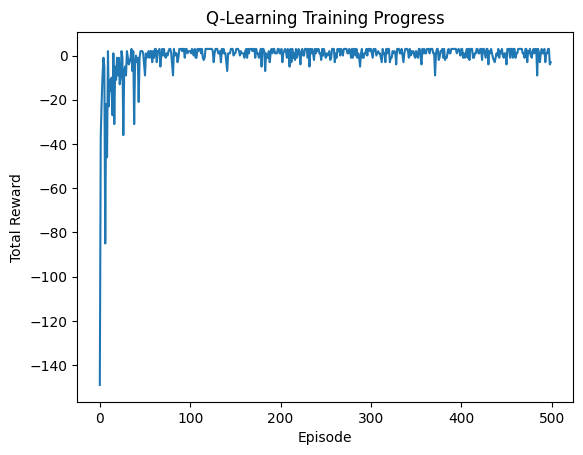

Learned Policy:
[['→' '↓' '↓' '↓' '↓']
 ['→' '↓' '↓' '↓' '↓']
 ['→' '↓' '↓' '↓' '↓']
 ['→' '→' '→' '→' '↓']
 ['↑' '→' '→' '→' 'G']]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 5
start_state = (0, 0)
goal_state = (4, 4)

num_actions = 4

Q = np.zeros((grid_size, grid_size, num_actions))
alpha = 0.1
gamma = 0.9
eps = 0.2
episodes = 500

def step(state, action):
    x, y = state

    if action == 0:
        x = max(x - 1, 0)
    elif action == 1:
        x = min(x + 1, grid_size - 1)
    elif action == 2:
        y = max(y - 1, 0)
    elif action == 3:
        y = min(y + 1, grid_size - 1)

    new_state = (x, y)

    if new_state == goal_state:
        reward = 10
        done = True
    else:
        reward = -1
        done = False

    return new_state, reward, done

rewards_per_episode = []

for episode in range(episodes):
    state = start_state
    done = False
    total_reward = 0

    while not done:
        if np.random.rand() < eps:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(Q[state])

        new_state, reward, done = step(state, action)

        Q[state][action] += alpha * (
            reward + gamma * np.max(Q[new_state]) - Q[state][action]
        )

        state = new_state
        total_reward += reward

    rewards_per_episode.append(total_reward)

plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-Learning Training Progress")
plt.show()

actions_map = ['↑', '↓', '←', '→']
policy = np.full((grid_size, grid_size), ' ', dtype=str)

for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) == goal_state:
            policy[i, j] = 'G'
        else:
            policy[i, j] = actions_map[np.argmax(Q[i, j])]

print("Learned Policy:")
print(policy)
